In [1]:
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# W miejsce scikit-learn użyj techniki walidacji krzyżowej Grid Search z biblioteki spark_sklearn:
from spark_sklearn import GridSearchCV as GridSearchCV_Spark

In [4]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

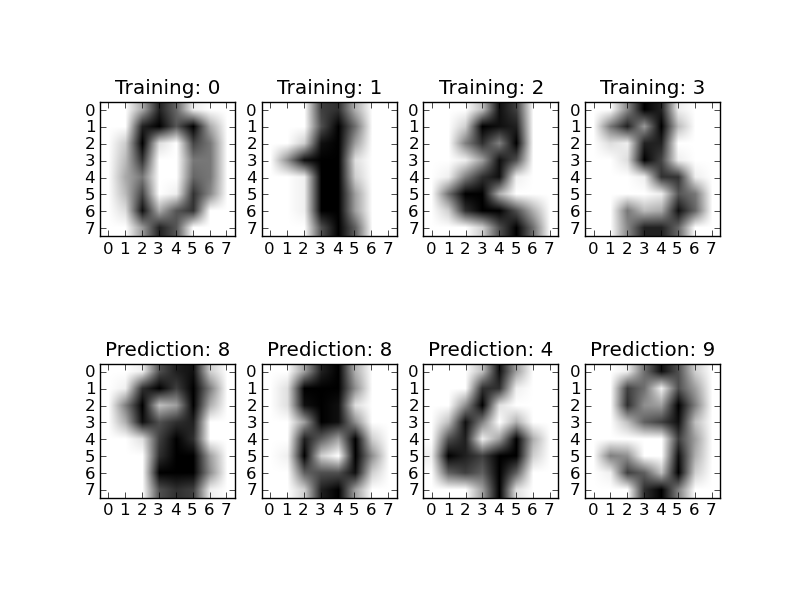

Słownik z nazwami parametrów jako kluczami i listami ustawień parametrów do przetestowania wariantów tworzonego modelu. Umożliwia to wyszukiwanie dowolnej sekwencji ustawień parametrów (hyper-parameters tuning).

In [5]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [10, 20, 40, 80]}

In [6]:
gs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, return_train_score=True, verbose=1)

In [7]:
gs.fit(X, y)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed:  3.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'n_estimators': [10, 20, 40, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed:  3.4min finished

In [8]:
df = pd.DataFrame.from_dict(gs.cv_results_)

In [9]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.012345,0.001202,0.001370,0.000097,True,gini,3,1,1,2,...,0.697830,0.689597,0.680022,0.019594,844,0.738912,0.770451,0.798501,0.769288,0.024341
1,0.022275,0.000063,0.002247,0.000018,True,gini,3,1,1,2,...,0.782972,0.744966,0.776294,0.023223,727,0.846025,0.844741,0.840133,0.843633,0.002530
2,0.044114,0.000079,0.004174,0.000022,True,gini,3,1,1,2,...,0.826377,0.761745,0.799110,0.027266,687,0.874477,0.872287,0.844296,0.863687,0.013740
3,0.091868,0.001938,0.008461,0.000525,True,gini,3,1,1,2,...,0.846411,0.805369,0.834168,0.020356,497,0.893724,0.912354,0.886761,0.897613,0.010804
4,0.011589,0.000058,0.001366,0.000070,True,gini,3,1,1,3,...,0.696160,0.677852,0.670562,0.024372,853,0.757322,0.749583,0.790175,0.765693,0.017597


## Czas na Sparka

http://localhost:4040

In [6]:
gs_spark = GridSearchCV_Spark(spark.sparkContext, RandomForestClassifier(), param_grid=param_grid, verbose=3)

In [7]:
gs_spark.fit(X, y)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'n_estimators': [10, 20, 40, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       sc=<SparkContext master=local[*] appName=pyspark-shell>,
       scoring=None, verbose=3)

Time elapsed: 1.6min

In [19]:
df_spark = pd.DataFrame.from_dict(gs_spark.cv_results_)

In [20]:
df_spark

,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,...,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params
0,0.752492,0.681135,0.632550,0.688926,0.049274,840,0.760669,0.754591,0.748543,0.754601,...,0.002210,0.000415,True,gini,3,1,1,2,10,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
1,0.797342,0.776294,0.699664,0.757930,0.041937,772,0.850209,0.807179,0.806828,0.821405,...,0.005034,0.003575,True,gini,3,1,1,2,20,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
2,0.797342,0.796327,0.843960,0.812465,0.022190,612,0.856067,0.868114,0.890924,0.871702,...,0.005784,0.001020,True,gini,3,1,1,2,40,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
3,0.850498,0.831386,0.833893,0.838620,0.008493,469,0.901255,0.907346,0.922565,0.910388,...,0.009279,0.000222,True,gini,3,1,1,2,80,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
4,0.705980,0.707846,0.723154,0.712298,0.007686,831,0.776569,0.742070,0.768526,0.762388,...,0.001653,0.000309,True,gini,3,1,1,3,10,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
5,0.762458,0.803005,0.755034,0.773511,0.021074,734,0.849372,0.849750,0.828476,0.842533,...,0.002607,0.000280,True,gini,3,1,1,3,20,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
6,0.842193,0.814691,0.818792,0.825264,0.012131,561,0.876987,0.898164,0.871774,0.882308,...,0.005576,0.000897,True,gini,3,1,1,3,40,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
7,0.852159,0.844741,0.822148,0.839733,0.012754,460,0.897908,0.922371,0.925895,0.915391,...,0.010175,0.000930,True,gini,3,1,1,3,80,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
8,0.627907,0.722871,0.652685,0.667780,0.040248,849,0.734728,0.797997,0.791840,0.774855,...,0.008274,0.004663,True,gini,3,1,1,10,10,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
9,0.790698,0.771285,0.721477,0.761269,0.029133,761,0.827615,0.835559,0.849292,0.837489,...,0.002463,0.000017,True,gini,3,1,1,10,20,"{'bootstrap': True, 'criterion': 'gini', 'max_..."


In [25]:
df_spark.columns

Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'param_bootstrap',
       'param_criterion', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params'],
      dtype='object')

In [27]:
df.loc[df_spark.rank_test_score.idxmax()][['param_bootstrap', \
                                           'param_criterion', \
                                           'param_max_depth', \
                                           'param_max_features', \
                                           'param_min_samples_leaf', \
                                           'param_min_samples_split', \
                                           'param_n_estimators', \
                                           'params']]

param_bootstrap                                                         True
param_criterion                                                      entropy
param_max_depth                                                            3
param_max_features                                                         1
param_min_samples_leaf                                                     3
param_min_samples_split                                                   10
param_n_estimators                                                        10
params                     {'bootstrap': True, 'criterion': 'entropy', 'm...
Name: 236, dtype: object